## Bigchain POC
#### Spin up bigchain
```bash
docker run \
  --detach \
  --name bigchaindb \
  --publish 9984:9984 \
  --publish 9985:9985 \
  --publish 27017:27017 \
  --publish 26657:26657 \
  --volume $(pwd)/bigchaindb_docker/mongodb/data/db:/data/db \
  --volume $(pwd)/bigchaindb_docker/mongodb/data/configdb:/data/configdb \
  --volume $(pwd)/bigchaindb_docker/tendermint:/tendermint \
  bigchaindb/bigchaindb:all-in-one
```

In [1]:
from bigchaindb_driver import BigchainDB
from bigchaindb_driver.crypto import generate_keypair


## Generate one transaction

In [38]:
bdb = BigchainDB('http://localhost:9984')
alice = generate_keypair()
tx = bdb.transactions.prepare(
    operation='CREATE',
    signers=alice.public_key,
    asset={'data': {'message': 'New message', 'gender': 'Female'}})
signed_tx = bdb.transactions.fulfill(
    tx,
    private_keys=alice.private_key
)
bdb.transactions.send_commit(signed_tx)

{'asset': {'data': {'gender': 'Female', 'message': 'New message'}},
 'id': '135b7bf4f79dae93937b205adfcd56b2ef10dd8ddbae3b06ca2dcf167c41e076',
 'inputs': [{'fulfillment': 'pGSAIN6TG7dTo2-uBFNu81euuwaSa_zMXQVy1tzGqqeOVcmDgUAzNpKOHzdDMOdwDs-uyw8hg4nzD6nAAJrDVDIuCXNYXTtwGMhVbaUlnhpYWOHNXloqvK9XAE59jcpMyVMd3UoG',
   'fulfills': None,
   'owners_before': ['FyqcWSRgUzjkmdENr2Bf4VrpQmUrQGL4CCZp5iD7pCxA']}],
 'metadata': None,
 'operation': 'CREATE',
 'outputs': [{'amount': '1',
   'condition': {'details': {'public_key': 'FyqcWSRgUzjkmdENr2Bf4VrpQmUrQGL4CCZp5iD7pCxA',
     'type': 'ed25519-sha-256'},
    'uri': 'ni:///sha-256;2gHgYR2YF6Qjra1jG3a82wEMWrJ1nSWTkbBM22VFsn0?fpt=ed25519-sha-256&cost=131072'},
   'public_keys': ['FyqcWSRgUzjkmdENr2Bf4VrpQmUrQGL4CCZp5iD7pCxA']}],
 'version': '2.0'}

## List all nodes

In [39]:
bdb.nodes

({'endpoint': 'http://localhost:9984', 'headers': {}},)

In [40]:
bdb.transactions.get(asset_id=signed_tx["id"])

[{'inputs': [{'owners_before': ['FyqcWSRgUzjkmdENr2Bf4VrpQmUrQGL4CCZp5iD7pCxA'],
    'fulfills': None,
    'fulfillment': 'pGSAIN6TG7dTo2-uBFNu81euuwaSa_zMXQVy1tzGqqeOVcmDgUAzNpKOHzdDMOdwDs-uyw8hg4nzD6nAAJrDVDIuCXNYXTtwGMhVbaUlnhpYWOHNXloqvK9XAE59jcpMyVMd3UoG'}],
  'outputs': [{'public_keys': ['FyqcWSRgUzjkmdENr2Bf4VrpQmUrQGL4CCZp5iD7pCxA'],
    'condition': {'details': {'type': 'ed25519-sha-256',
      'public_key': 'FyqcWSRgUzjkmdENr2Bf4VrpQmUrQGL4CCZp5iD7pCxA'},
     'uri': 'ni:///sha-256;2gHgYR2YF6Qjra1jG3a82wEMWrJ1nSWTkbBM22VFsn0?fpt=ed25519-sha-256&cost=131072'},
    'amount': '1'}],
  'operation': 'CREATE',
  'metadata': None,
  'asset': {'data': {'message': 'New message', 'gender': 'Female'}},
  'version': '2.0',
  'id': '135b7bf4f79dae93937b205adfcd56b2ef10dd8ddbae3b06ca2dcf167c41e076'}]

In [41]:
bdb.assets.get(search="New")

[{'data': {'message': 'New message'},
  'id': 'a2ec775afe3f8541f759cdcc2a705cc4fb1191d87abff019906cde8a9da3c5cd'},
 {'data': {'message': 'New message', 'gender': 'Male'},
  'id': '01f9248b571516fc887886aa41248edb73c0f2e75b06633c5e0e486223bce617'},
 {'data': {'message': 'New message', 'gender': 'Male'},
  'id': '6766ec111408f85e9fb9b18028ac9c315e2ca1ef1ba1e412b1a0268b9dacae04'},
 {'data': {'message': 'New message', 'gender': 'Male'},
  'id': 'b3b5f7f3c4b9a5ba958735f9e9a1d1a91d8effccdc1f2b7557033ea4dc3e3f56'},
 {'data': {'message': 'New message', 'gender': 'Male'},
  'id': '22664a5e3cf05e8f179b248c60b8f55e8cb05afe5fc97cc6c604e4ca5fa7d758'},
 {'data': {'message': 'New message', 'gender': 'Female'},
  'id': '135b7bf4f79dae93937b205adfcd56b2ef10dd8ddbae3b06ca2dcf167c41e076'}]

In [42]:
bdb.assets.get(search="New", limit=1)

[{'data': {'message': 'New message'},
  'id': 'a2ec775afe3f8541f759cdcc2a705cc4fb1191d87abff019906cde8a9da3c5cd'}]

## Listen to events
```bash
npm install -g wscat
wscat  -c ws://localhost:9985/api/v1/streams/valid_transactions
```

In [33]:
for i in range(3):
    alice = generate_keypair()
    tx = bdb.transactions.prepare(
            operation='CREATE',
            signers=alice.public_key,
            asset={'data': {'message': 'New message', 'gender': 'Male'}}
    )
    signed_tx = bdb.transactions.fulfill(
        tx,
        private_keys=alice.private_key
    )
    bdb.transactions.send_commit(signed_tx)
    

## Result

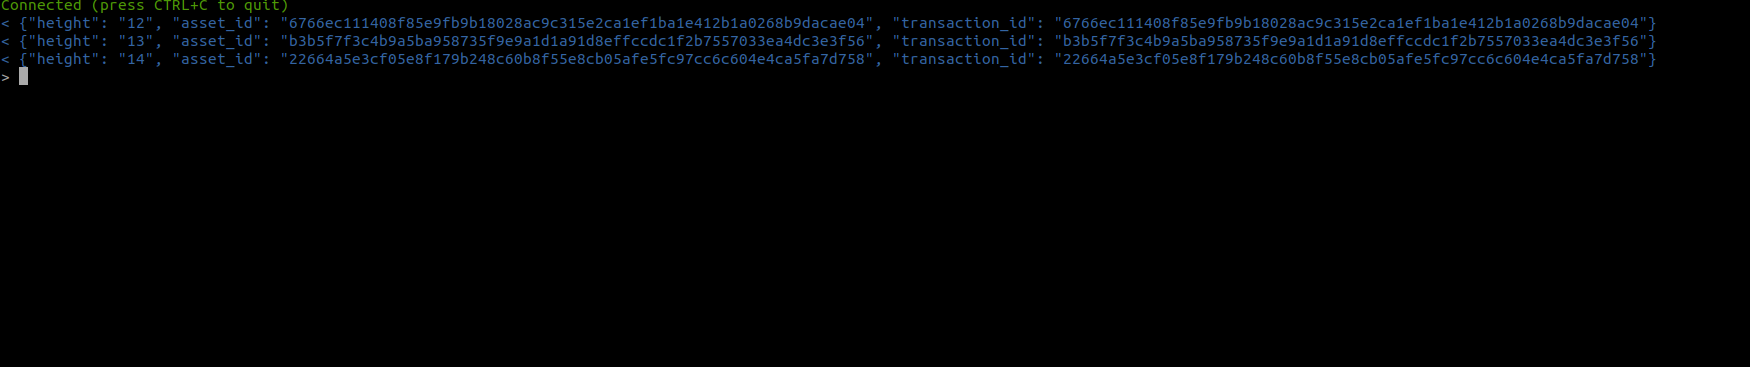

## Todo: Experiment with more nodes, and RBAC